# Handwritten Letters Recognition

This is a notebook that implements a CNN model to recognize handwritten letters

### Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

2024-08-03 12:49:08.547408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 12:49:08.558844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 12:49:08.562262: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 12:49:08.572307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 12:49:09.332679: W tensorflow/compiler/tf2

### Setting up the data

In [2]:
train_ds = pd.read_csv('/home/alpha/Projects/ML_internship/CodeAlpha_Handwritten_Letters_Recognition/Data/emnist-letters-train.csv')
test_ds = pd.read_csv('/home/alpha/Projects/ML_internship/CodeAlpha_Handwritten_Letters_Recognition/Data/emnist-letters-test.csv')

In [3]:
print(train_ds.shape)
print(test_ds.shape)

(88799, 785)
(14799, 785)


In [4]:
X_train = np.array(train_ds.iloc[:, 1:].values)
y_train = np.array(train_ds.iloc[:, 0].values)

X_test = np.array(test_ds.iloc[:, 1:].values)
y_test = np.array(test_ds.iloc[:, 0].values)

7


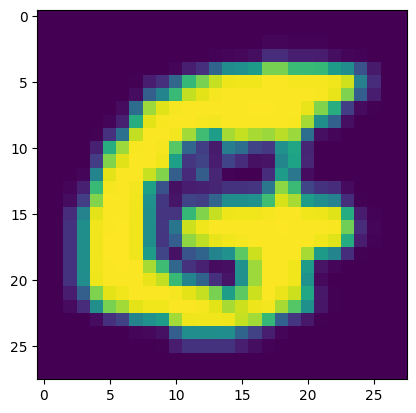

In [5]:
picture_number = 0
print(y_train[picture_number])
plt.imshow(X_train[picture_number].reshape(28, 28).T)
plt.show()

### Process the data (Normalization and Augmentation)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
batch_number_train = train_ds.shape[0]
batch_number_test = test_ds.shape[0]
IMG_HEIGHT = 28
IMG_WIDTH = 28
CHANNELS = 1

X_train = X_train.reshape(batch_number_train, IMG_HEIGHT, IMG_WIDTH, CHANNELS)
X_test = X_test.reshape(batch_number_test, IMG_HEIGHT, IMG_WIDTH, CHANNELS)

In [8]:
NUMBER_OF_CLASSES = 27
y_train = to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = to_categorical(y_test, NUMBER_OF_CLASSES)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Building the model

In [14]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(27, activation='softmax')
])


In [15]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=5,mode='max')
reduce_LR_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('Best_Model.keras',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, steps_per_epoch=len(X_train) // batch_number_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping, reduce_LR_on_plateau, model_checkpoint])

Epoch 1/100
2217/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6338 - loss: 1.2835
Epoch 1: val_accuracy improved from -inf to 0.89229, saving model to Best_Model.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.6340 - loss: 1.2827 - val_accuracy: 0.8923 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8442 - loss: 0.4835
Epoch 2: val_accuracy improved from 0.89229 to 0.90676, saving model to Best_Model.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8442 - loss: 0.4835 - val_accuracy: 0.9068 - val_loss: 0.2800 - learning_rate: 0.0010
Epoch 3/100
2219/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8715 - loss: 0.4030
Epoch 3: val_accuracy improved from 0.90676 to 0.92157, saving model to Best_Model.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8715 - loss: 0.4030 - val_accuracy: 0.9216 - val_loss: 0.2410 - learning_rate: 0.0010
Epoch 4/100
2219/2220 ━━━━━━━━━

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9332 - loss: 0.2043
Test Accuracy: 92.34%
Test Loss: 0.2149


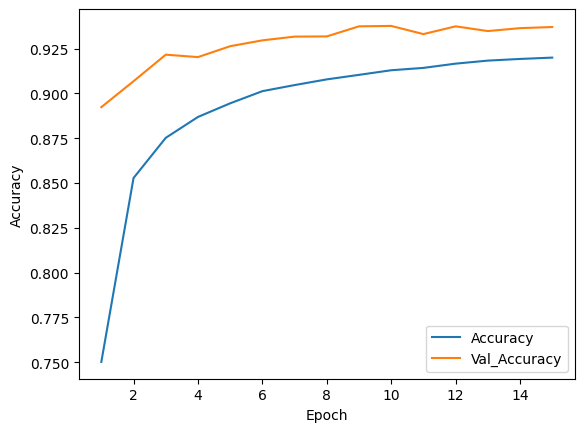

In [19]:
sn.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['accuracy'],label='Accuracy')
sn.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()